In [1]:
# Theses are different ways to display figures, depending on the
# environment, some may work better or some not at all:
%matplotlib inline
# %matplotlib notebook
# %matplotlib ipympl
# %matplotlib widget
#      widget, if installed and working, gives nicer inline plots
# %matplotlib nbagg
# Fix failing variable completion (for older installations):
# %config Completer.use_jedi = False

# First, Simplest Usecase

Let's optimize a simple ellipsoid function, $\sum_{i=1}^n 1000^{\frac{i-1}{n-1}}x_i^2$, whose Hessian has a condition number of $10^6$:

In [2]:
# pip install cma  # outcomment in case the cma module is not installed
import cma

fun = cma.ff.elli  # we could use `functools.partial(cma.ff.elli, cond=1e4)` to change the condition number to 1e4
x0 = 4 * [2]  # initial solution
sigma0 = 1    # initial standard deviation to sample new solutions

xopt, es = cma.fmin2(fun, x0, sigma0)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=713490, Sun Jul 21 20:57:42 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 6.446536636048229e+04 1.0e+00 1.05e+00  1e+00  1e+00 0:00.0
    2     16 2.630940010834563e+05 1.3e+00 1.02e+00  9e-01  1e+00 0:00.0
    3     24 1.214767413347750e+04 1.2e+00 1.13e+00  1e+00  1e+00 0:00.0
  100    800 4.255371293268891e-04 1.1e+03 1.81e-02  2e-05  2e-02 0:00.1
  191   1528 8.343782102305703e-15 1.0e+03 2.61e-06  9e-11  9e-08 0:00.1
termination on tolfun=1e-11 (Sun Jul 21 20:57:42 2024)
final/bestever f-value = 6.720864e-15 6.720864e-15 after 1529/1529 evaluations
incumbent solution: [7.917054600529817e-09, -6.199782930332116e-09, -4.909188477164608e-10, -2.0110701434331427e-11]
std deviation: [8.921924611203253e-08, 9.514519331128947e-09, 8.395947158886565e-10, 8.606723277924286e-11]


The return values are
- `x`, the best evaluated solution and
- `es`, the `cma.CMAEvolutionStrategy` class instance used to run the optimization.

The latter contains all available information about the run and the more complete return value under `es.result`.

In [3]:
dict(es.result._asdict())  # pretty print the named tuple as dictionary

{'xbest': array([ 7.91705460e-09, -6.19978293e-09, -4.90918848e-10, -2.01107014e-11]),
 'fbest': 6.720864054484913e-15,
 'evals_best': 1529,
 'evaluations': 1529,
 'iterations': 191,
 'xfavorite': array([ 7.91705460e-09, -6.19978293e-09, -4.90918848e-10, -2.01107014e-11]),
 'stds': array([8.92192461e-08, 9.51451933e-09, 8.39594716e-10, 8.60672328e-11]),
 'stop': {'tolfun': 1e-11}}

In [4]:
es.result_pretty()  # shows some pretty information and returns es.result

termination on tolfun=1e-11
final/bestever f-value = 6.720864e-15 6.720864e-15 after 1529/1529 evaluations
incumbent solution: [7.917054600529817e-09, -6.199782930332116e-09, -4.909188477164608e-10, -2.0110701434331427e-11]
std deviation: [8.921924611203253e-08, 9.514519331128947e-09, 8.395947158886565e-10, 8.606723277924286e-11]


CMAEvolutionStrategyResult(xbest=array([ 7.91705460e-09, -6.19978293e-09, -4.90918848e-10, -2.01107014e-11]), fbest=6.720864054484913e-15, evals_best=1529, evaluations=1529, iterations=191, xfavorite=array([ 7.91705460e-09, -6.19978293e-09, -4.90918848e-10, -2.01107014e-11]), stds=array([8.92192461e-08, 9.51451933e-09, 8.39594716e-10, 8.60672328e-11]), stop={'tolfun': 1e-11})

# Options and Plotting
Let's plot some data from the optimization. The above call to `cma.fmin2` has (by default) written data to the default output folder `outcmaes`. These data will be overwritten each time the function is called again. To prevent this, we could set/change the output folder with the `verb_filenameprefix` option. An effective way to find out this kind of behavior is to query the [`CMAOptions`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAOptions.html) with a search string and read the comments in the return "value".

In [5]:
cma.CMAOptions('file')

{'signals_filename': 'cma_signals.in  # read versatile options from this file (use `None` or `""` for no file) which contains a single options dict, e.g. ``{"timeout": 0}`` to stop, string-values are evaluated, e.g. "np.inf" is valid',
 'verb_append': '0  # initial evaluation counter, if append, do not overwrite output files',
 'verb_filenameprefix': 'outcmaes/  # output path (folder) and filenames prefix',
 'verb_log': '1  #v verbosity: write data to files every verb_log iteration, writing can be time critical on fast to evaluate functions'}

Plotting is as simple as

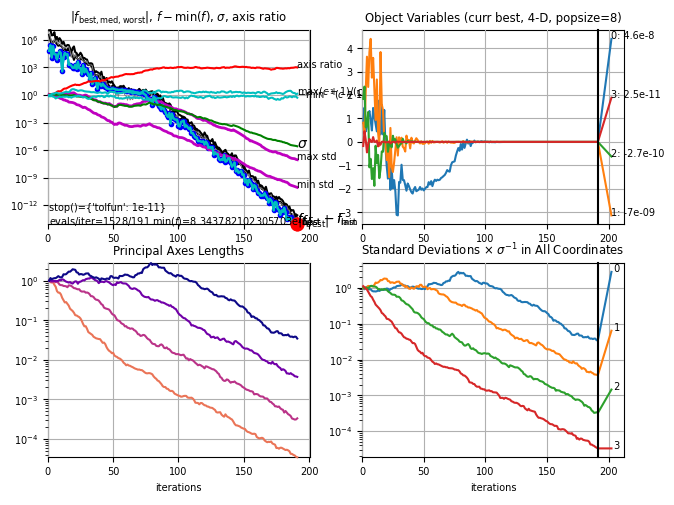

In [6]:
es.plot();  # cma.plot() does the same, as we just plot the data from the default output folder

A description of the output is given in the caption of Figure 3 in [Hansen et al (2015): Evolution Strategies](https://hal.inria.fr/hal-01155533/file/es-overview-2015.pdf#page=17).

# Options and Bound Constraints
We can add a boundary condition on any variable. We can find out how to do this, as mentioned above, by investigating the available boundary related options:

In [7]:
cma.CMAOptions('bound')  # returns options that contain "bound"

{'BoundaryHandler': 'BoundTransform  # or BoundPenalty, unused when ``bounds in (None, [None, None])``',
 'bounds': '[None, None]  # lower (=bounds[0]) and upper domain boundaries, each a scalar or a list/vector',
 'maxstd_boundrange': '1/3  # maximal std relative to bound_range per coordinate, overruled by maxstd'}

Let's bound the second variable from below to values $\ge1$ using the `'bounds'` option. In this case, we must also take care that the initial solution is within the given bounds (it is, in our case). `'bounds'` is a list of two values, `[lower_bounds, upper_bounds]`, where `lower_bounds` and `upper_bounds` can be a scalar that applies to all variables or a list. If the list is shorter than the initial solution, the last value is applied to the remaining dimensions.

In [8]:
xopt_b, es_b = cma.fmin2(fun, x0, sigma0, {'bounds': [[None, 1, None], None]})

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=757386, Sun Jul 21 20:57:43 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.454734340352848e+05 1.0e+00 1.08e+00  1e+00  1e+00 0:00.0
    2     16 2.423345593384891e+05 1.5e+00 1.26e+00  1e+00  2e+00 0:00.0
    3     24 2.689606938008919e+04 1.6e+00 1.12e+00  1e+00  1e+00 0:00.0
  100    800 1.000004806604596e+02 1.2e+03 1.54e-02  3e-05  3e-02 0:00.1
  190   1520 9.999999999999999e+01 1.2e+03 1.64e-06  8e-11  9e-08 0:00.1
termination on tolfun=1e-11 (Sun Jul 21 20:57:43 2024)
final/bestever f-value = 1.000000e+02 1.000000e+02 after 1521/1497 evaluations
incumbent solution: [3.304271032569038e-08, 1.0, -7.553637901639326e-11, 2.9590705868211502e-12]
std deviation: [8.852324524789504e-08, 2.4693252329589936e-09, 8.548906921664985e-10, 8.093340333116169e-11]


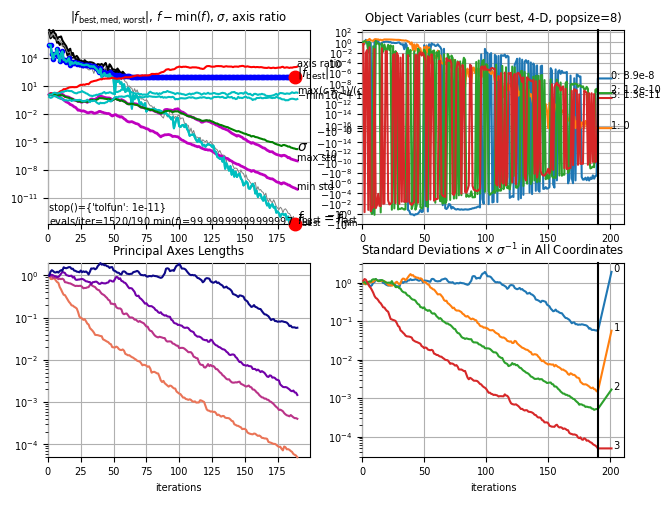

In [9]:
es.plot(xsemilog=True, x_opt=[0, 1] + (len(x0) - 2) * [0]);

### Rescaling of the Objective
In a practical application, the encoding of variables is often essential to turn a _very_ difficult problem into less difficult one, see also [here](https://cma-es.github.io/cmaes_sourcecode_page.html#practical). The simplest encoding is a rescaling, which can easily be done via the [`cma.ScaleCoordinates`](https://cma-es.github.io/apidocs-pycma/cma.fitness_transformations.ScaleCoordinates.html) class. Again, the [`CMAOptions`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAOptions.html) give the hint where to look.

In [10]:
cma.CMAOptions('scale')

{'CMA_stds': 'None  # multipliers for sigma0 in each coordinate (not represented in C), or use `cma.ScaleCoordinates` instead',
 'scaling_of_variables': 'None  # deprecated, rather use fitness_transformations.ScaleCoordinates instead (or CMA_stds). Scale for each variable in that effective_sigma0 = sigma0*scaling. Internally the variables are divided by scaling_of_variables and sigma is unchanged, default is `np.ones(N)`'}

We rescale the ellipsoid function to its most benign form. In dimension 4, this saves only about 30% of the necessary iterations.

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=744781, Sun Jul 21 20:57:44 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.010763549979623e+01 1.0e+00 1.01e+00  9e-01  1e+00 0:00.0
    2     16 8.700167362681306e+00 1.5e+00 1.08e+00  1e+00  1e+00 0:00.0
    3     24 8.434779789754456e+00 1.6e+00 1.09e+00  9e-01  1e+00 0:00.0
  100    800 6.079078591064733e-13 1.3e+00 2.48e-05  3e-07  4e-07 0:00.1
  114    912 1.027856632975749e-14 1.6e+00 8.68e-06  7e-08  9e-08 0:00.1
termination on tolfun=1e-11 (Sun Jul 21 20:57:44 2024)
final/bestever f-value = 5.687516e-15 3.770375e-15 after 913/895 evaluations
incumbent solution: [-3.743180192352633e-08, -4.784860665042953e-08, -3.4736834546465114e-08, -2.8111191689642252e-08]
std deviation: [8.56234457207418e-08, 8.024681265594798e-08, 7.026017357287184e-08, 7.257788655903464e-08]


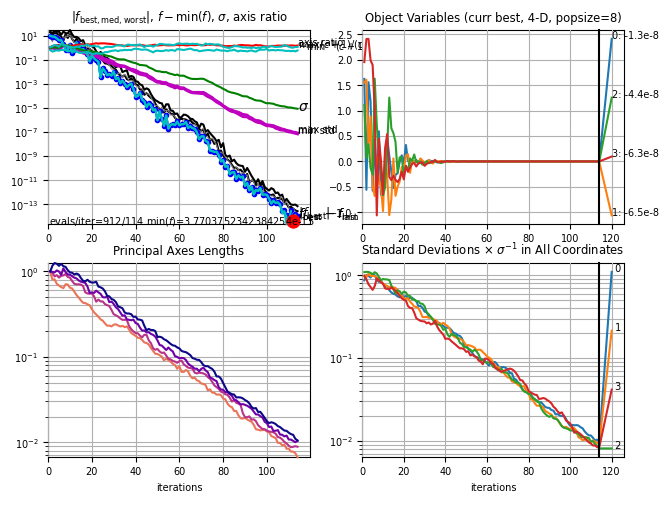

In [11]:
fun2 = cma.ScaleCoordinates(fun, [1000**(-i / 3) for i in range(4)])
xopt2, es2 = cma.fmin2(fun2, x0, sigma0)
cma.plot();


On the 40-dimension ellipsoid function, the saving is much more substantial, namely a factor of about 6 to 7:

In [12]:
xopt40, es40 = cma.fmin2(fun, 40 * [2], sigma0, {'verbose':-9})
xopt0, es0 = cma.fmin2(cma.ScaleCoordinates(fun,
                                            [1000**(-i / 39) for i in range(40)]),
                       40 * [2], sigma0, {'verbose':-9})

In [13]:
es40.result.fbest, es0.result.fbest, es40.result.evals_best / es0.result.evals_best

(2.5266668360356082e-14, 2.737222056079766e-14, 6.475588160890463)

Without covariance matrix adaptation, the saving from rescaling would be even _much_ more substantial, namely a factor of about $10\,000$, which can be inferred from Figure 10 in [Hansen and Ostermeier (2001)](http://www.cmap.polytechnique.fr/~nikolaus.hansen/publications.html#hansenaost2001).

### Advanced Options Settings
#### Setting the step-size adaptation
Apart from the default cumulative step-size adaptation, another competitive way to adapt the step-size is the two-point step-size adaptation, TPA, see Equations (6)-(8) in [Akimoto and Hansen (2016)](https://hal.inria.fr/hal-01306551).

In [14]:
cma.CMAOptions('sigma')

{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_dampsvec_fac': 'np.inf  # tentative and subject to changes, 0.5 would be a "default" damping for sigma vector update',
 'CMA_dampsvec_fade': '0.1  # tentative fading out parameter for sigma vector update',
 'CMA_stds': 'None  # multipliers for sigma0 in each coordinate (not represented in C), or use `cma.ScaleCoordinates` instead',
 'CSA_squared': 'False  #v use squared length for sigma-adaptation ',
 'scaling_of_variables': 'None  # deprecated, rather use fitness_transformations.ScaleCoordinates instead (or CMA_stds). Scale for each variable in that effective_sigma0 = sigma0*scaling. Internally the variables are divided by scaling_of_variables and sigma is unchanged, default is `np.ones(N)`',
 'stall_sigma_change_on_divergence_iterations': 'False  #v number of iterations of median worsenings threshold at which the sigma change is stalled; the default may become 2',
 'tolupsi

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=642367, Sun Jul 21 20:57:48 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 5.820797294400942e+03 1.0e+00 9.23e-01  9e-01  1e+00 0:00.0
    2     16 2.344579092798409e+04 1.2e+00 9.24e-01  9e-01  1e+00 0:00.0
    3     24 1.018558786601587e+04 1.3e+00 8.94e-01  7e-01  1e+00 0:00.0
  100    800 2.295783383863096e-02 9.8e+02 9.92e-02  1e-04  1e-01 0:00.1
  190   1520 1.419693469461495e-14 9.6e+02 2.79e-06  7e-11  7e-08 0:00.1
termination on tolfun=1e-11 (Sun Jul 21 20:57:48 2024)
final/bestever f-value = 7.336538e-15 4.842908e-15 after 1521/1506 evaluations
incumbent solution: [-5.790662800312958e-08, -4.3019849190639563e-10, -2.527270925443822e-10, 5.767272528712736e-11]
std deviation: [6.71434760609353e-08, 6.3795476485319385e-09, 6.127478931789347e-10, 6.803279122126993e-11]


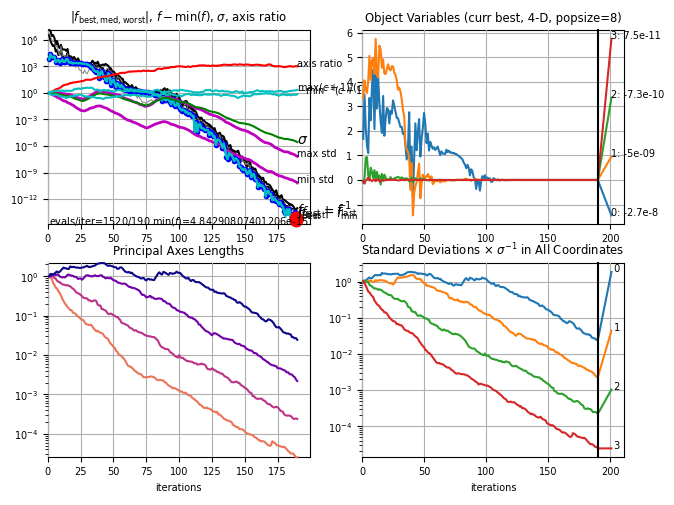

In [15]:
xopt, es = cma.fmin2(fun, x0, sigma0,
                     {'AdaptSigma': cma.sigma_adaptation.CMAAdaptSigmaTPA})
cma.plot();

Without step-size adaptation, the "final" convergence stage of the optimization takes about 3 to 4 times longer (and the effect would become more pronounced in higher dimension):

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=775604, Sun Jul 21 20:57:48 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 5.339591208094516e+05 1.0e+00 1.00e+00  9e-01  1e+00 0:00.0
    2     16 4.064144659123043e+04 1.3e+00 1.00e+00  9e-01  1e+00 0:00.0
    3     24 7.926485015637887e+04 1.6e+00 1.00e+00  9e-01  1e+00 0:00.0
  100    800 2.933740987896287e-01 1.0e+03 1.00e+00  5e-04  5e-01 0:00.0
  200   1600 3.854374209001097e-05 1.0e+03 1.00e+00  5e-06  4e-03 0:00.1
  300   2400 3.051657102472718e-09 8.4e+02 1.00e+00  5e-08  4e-05 0:00.1
  388   3104 1.754315637589014e-12 1.2e+03 1.00e+00  8e-10  9e-07 0:00.1
termination on tolfun=1e-11 (Sun Jul 21 20:57:49 2024)
final/bestever f-value = 8.616337e-13 8.616337e-13 after 3105/3105 evaluations
incumbent solution: [-6.396534518170344e-07, 5.500524862334838e-08, -3.124712870094291e-09, -2.2865068376943272e-10]
std deviation: [9.212008978496648e-07, 7.620295981943689e-08, 7.906775454364

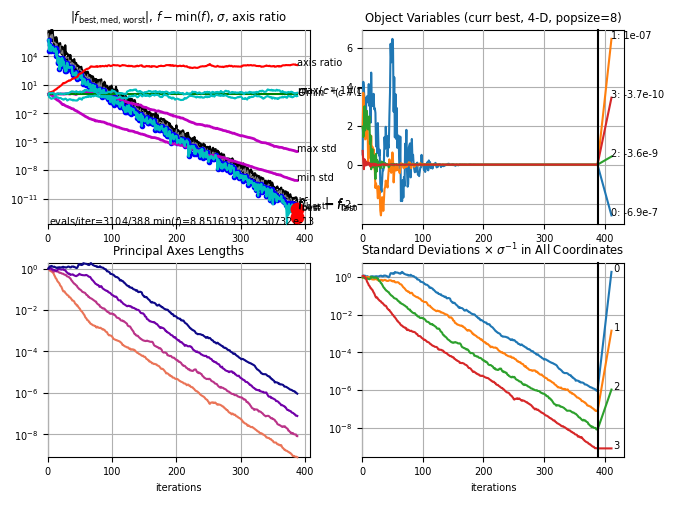

In [16]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'AdaptSigma': False})
cma.plot();

#### Setting different learning rates
A more research related option is the manual setting of learning rates. We can find the relevant options for the covariance matrix update like

In [17]:
cma.CMAOptions('covar')

{'CMA_active_limit_int_std': 'inf  # limit coordinate std of solutions in negative covariance matrix update',
 'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_on': '1  # multiplier for all covariance matrix updates',
 'CMA_rankmu': '1.0  # multiplier for rank-mu update learning rate of covariance matrix',
 'CMA_rankone': '1.0  # multiplier for rank-one update learning rate of covariance matrix',
 'tolconditioncov': '1e14  #v stop if the condition of the covariance matrix is above `tolconditioncov`'}

If we want to run CMA-ES only with rank-$\mu$ update, we set the learning rate for the rank-one update to zero. Then, to get a solution of the same quality on the 4-dimensional ellipsoid function, it takes on average about 15% more iterations.

In [18]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'CMA_rankone': 0})

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=786619, Sun Jul 21 20:57:49 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.124154372651093e+06 1.0e+00 1.16e+00  1e+00  1e+00 0:00.0
    2     16 1.431053069954920e+04 1.1e+00 1.41e+00  1e+00  2e+00 0:00.0
    3     24 1.355205992061952e+05 1.3e+00 1.37e+00  1e+00  2e+00 0:00.0
  100    800 8.933954203709855e-04 6.3e+02 7.32e-03  5e-05  2e-02 0:00.0
  191   1528 3.257454585690387e-15 1.2e+03 9.40e-08  7e-11  8e-08 0:00.1
termination on tolfun=1e-11 (Sun Jul 21 20:57:49 2024)
final/bestever f-value = 2.221614e-15 2.221614e-15 after 1529/1529 evaluations
incumbent solution: [-3.213620167883902e-08, -1.745672528403226e-09, -2.0364998670729577e-10, 2.1665822319088905e-11]
std deviation: [7.88280242576471e-08, 9.078469808341107e-09, 5.840796155131138e-10, 6.65609045112828e-11]


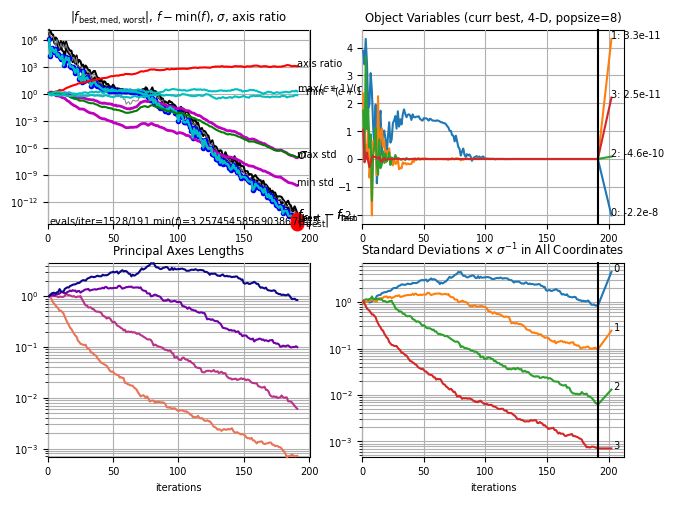

In [19]:
cma.plot();

## See Also

Other [`notebooks and recipes`](https://github.com/CMA-ES/pycma/tree/master/notebooks), as this one, can be found at [https://github.com/CMA-ES/pycma/tree/master/notebooks](https://github.com/CMA-ES/pycma/tree/master/notebooks)

More `notebook-recipes` to come...